# Chuẩn bị thư viện

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import gdown

# Load Images

In [52]:
gdown.download('https://drive.google.com/uc?export=download&id=18em8-ZDE7KBiDlmUOKe5eCIzc8rz08bV', 'kevin-sanjaya.jpg', quiet=False)
gdown.download('https://drive.google.com/uc?export=download&id=1eh7-t160k0SfwQomzeoife1jGlp0kxFg', 'anh2.jpg', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=18em8-ZDE7KBiDlmUOKe5eCIzc8rz08bV
To: /content/kevin-sanjaya.jpg
100%|██████████| 38.3k/38.3k [00:00<00:00, 40.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1eh7-t160k0SfwQomzeoife1jGlp0kxFg
To: /content/anh2.jpg
100%|██████████| 208k/208k [00:00<00:00, 71.1MB/s]


'anh2.jpg'

In [53]:
fil_path = '/content'  # Base directory path for image files
imgKevin = 'kevin-sanjaya.jpg'  # Filename of the Karl Marx image
imgRachGia = 'anh2.jpg'# Filename of the Rach Gia image

In [59]:
imgKevin_path = os.path.join(fil_path, imgKevin)  # Full path for Karl Marx image
imgRachGia_path = os.path.join(fil_path, imgRachGia) # Full path for Rach Gia image

# BTVN

## Lý thuyết về  Noise

1. **Câu hỏi**: Uniform noise là gì? Khác biệt giữa uniform noise và Gaussian noise là gì?

Uniform noise và Gaussian Noise (cùng với Possion noise) là một phần của Additive noise. Additive noise là nhiễu "Tiêu chuẩn" đối với ảnh sáng thường được coi là có phân phối Gaussian, nhưng phân phối Possion sẽ chính xác hơn nhưng lại khó để mô hình hóa hơn, trong khi phân phối Uniform sẽ dễ mô hình hóa hơn.

Sự khác biệt của Uniform noise và Gaussian Noise là ở đặc điểm phân phối và cách chúng ảnh hưởng đến ảnh gốc.

Uniform noise có giá trị phân phối đồng đều trong một khoảng xác định [a, b]. Mỗi giá trị trong khoảng này có xác suất xuất hiện như nhau.

Với hàm phân phối của Uniform noise:
$p(x) = \frac{1}{b - a}\quad \text{với } a \leq x \leq b$

Uniform noise làm ảnh bị nhiễu một cách đồng đều, dễ nhận diện vì không tạo ra các đốm sáng tối hoặc biến động lớn.

Gaussian noise tuân theo phân phối chuẩn với kỳ vọng 𝜇 và độ lệch chuẩn 𝜎. Hầu hết giá trị của nhiễu tập trung quanh giá trị trung bình μ, và xác suất giảm dần khi giá trị càng xa kỳ vọng.

Với hàm phân phối của Gaussian noise:
$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Gaussian noise làm ảnh bị nhiễu không đều, cụ thể, nó thường tạo ra những đốm sáng tối nhỏ rải rác trên ảnh. Tác động của Gaussian noise đối với ảnh cũng gần giống như nhiễu từ cảm biến của camera thông thường.

2. **Câu hỏi**: Nêu một số ứng dụng thực tế của việc thêm noise vào dữ liệu hoặc ảnh trong lĩnh vực **Machine Learning** và **Computer Vision**.

Trong **Machine Learning**, noise đóng một vai trò quan trọng và không thể thiếu.  Noise có thể được sử dụng để tăng tính ổn định và khả năng tổng quát hóa của mô hình. Bằng cách thêm một lượng nhỏ nhiễu vào dữ liệu huấn luyện, mô hình có thể xử lý tốt hơn các dữ liệu thực tế không hoàn hảo. Tuy nhiên, nếu thêm quá nhiều nhiễu, mô hình có thể học nhiễu thay vì học các đặc trưng quan trọng từ dữ liệu.

Ví dụ: Trong bài toán phân loại ảnh, khi huấn luyện mô hình nhận diện chữ viết tay (như MNIST), việc thêm Gaussian noise nhỏ vào các ảnh chữ viết tay sẽ giúp mô hình xử lý tốt hơn các trường hợp ảnh bị mờ hoặc nhiễu khi quét thực tế. Điều này làm tăng độ chính xác trên dữ liệu thực tế.

Trong lĩnh vực **Computer Vision**, việc hiểu và xử lý noise là chìa khóa để tăng độ chính xác và độ tin cậy cho các ứng dụng. Các kỹ thuật giảm nhiễu hoặc làm mô hình quen thuộc với các dạng nhiễu khác nhau giúp hệ thống trở nên mạnh mẽ hơn khi hoạt động trong điều kiện thực tế.

Ví dụ: Trong lĩnh vực y tế, khi xử lý ảnh X-quang hoặc MRI, Gaussian noise có thể xuất hiện do thiết bị quét hoặc môi trường. Sử dụng các thuật toán lọc như Gaussian blur hoặc mô hình học sâu để loại bỏ noise, hệ thống có thể cải thiện khả năng phát hiện bệnh, như ung thư phổi từ hình ảnh y tế.










## **Phần 1.1: Thực hành trên Dữ liệu Số**

In [48]:
def add_uniform_noise_array(data, noise_range):
    """
    Thêm nhiễu uniform vào mảng data.

    Parameters:
        data (numpy.ndarray): Mảng data cần thêm nhiễu.
        noise_range (tuple): Khoảng giá trị nhiễu (min, max).

    Returns:
        numpy.ndarray: Mảng data sau khi thêm nhiễu.
    """
    # Chuẩn hóa mảng data về khoảng [0, 1] dựa trên giá trị min và max của chính nó
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)

    # In dữ liệu đã chuẩn hóa
    print("Dữ liệu sau khi chuẩn hóa:", normalized_data)

    # Tạo nhiễu uniform cùng kích thước với data
    noise = np.random.uniform(low=noise_range[0], high=noise_range[1], size=data.shape)

    # Thêm nhiễu vào data đã chuẩn hóa
    noisy_data = normalized_data + noise

    # Đảm bảo giá trị của mảng sau khi thêm nhiễu vẫn nằm trong khoảng [0, 1]
    noisy_data = np.clip(noisy_data, 0, 1)

    return noisy_data


In [49]:
data1 = np.array([10, 20, 30, 40, 50])
noisy_data1 = add_uniform_noise_array(data1, noise_range=(-2, 2))
print("Dữ liệu sau khi thêm nhiễu:", noisy_data1)

Dữ liệu sau khi chuẩn hóa: [0.   0.25 0.5  0.75 1.  ]
Dữ liệu sau khi thêm nhiễu: [0.07312207 0.         0.85256412 0.0960307  1.        ]


In [50]:
data2 = np.array([10, 20, 30, 40, 50])
noisy_data2 = add_uniform_noise_array(data2, noise_range=(-0.5, 0.5))
print("Dữ liệu sau khi thêm nhiễu:", noisy_data2)

Dữ liệu sau khi chuẩn hóa: [0.   0.25 0.5  0.75 1.  ]
Dữ liệu sau khi thêm nhiễu: [0.         0.66927008 0.91749137 0.37565282 0.84070179]


In [51]:
data3 = np.array([10, 20, 30, 40, 50])
noisy_data3 = add_uniform_noise_array(data3, noise_range=(-5, 10))
print("Dữ liệu sau khi thêm nhiễu:", noisy_data3)

Dữ liệu sau khi chuẩn hóa: [0.   0.25 0.5  0.75 1.  ]
Dữ liệu sau khi thêm nhiễu: [0. 0. 1. 1. 1.]


**Nhận xét trực quan:**

Ảnh hưởng của khoảng nhiễu (noise_range):

Khoảng nhỏ như (-0.5, 0.5)  giúp dữ liệu thay đổi nhẹ, giữ được cấu trúc ban đầu và không gây mất mát thông tin. Trong khi đó, khoảng lớn như (-5 , 10)  khiến dữ liệu bị bóp méo nghiêm trọng và mất thông tin, vì các giá trị bị cắt về biên [0, 1]. Đối với khoảng (-2, 2) cũng là một khoảng hơi lớn khi các giá trị gần biên [0, 1] bị thay đổi đáng kể. Vì vậy ta cần sử dụng khoảng nhiễu vừa phải, tránh sử dụng khoảng nhiễu lớn vì có thể làm dữ liệu không còn đại diện cho thực tế, gây ra kết quả không mong muốn khi huấn luyện mô hình.



## **Phần 1.2: Thực hành trên Ảnh**


**Impulse noise**

In [60]:
def add_impulse_noise(image, prob):
    """
    Adds impulse (salt & pepper) noise to an image.

    Args:
    - image: Input image (numpy array).
    - prob: Probability of adding noise (0 < prob < 1).

    Returns:
    - noisy_img: Image with added noise.
    """
    # Create a copy of the original image to avoid modifying it directly
    noisy_img = image.copy()
    # Generate a random matrix with the same dimensions as the image
    random_matrix = np.random.rand(*image.shape[:2])

    # Add "salt" noise (white pixels)
    noisy_img[random_matrix < prob/2] = 255

    # Add "pepper" noise (black pixels)
    noisy_img[random_matrix > 1 - prob/2] = 0

    return noisy_img


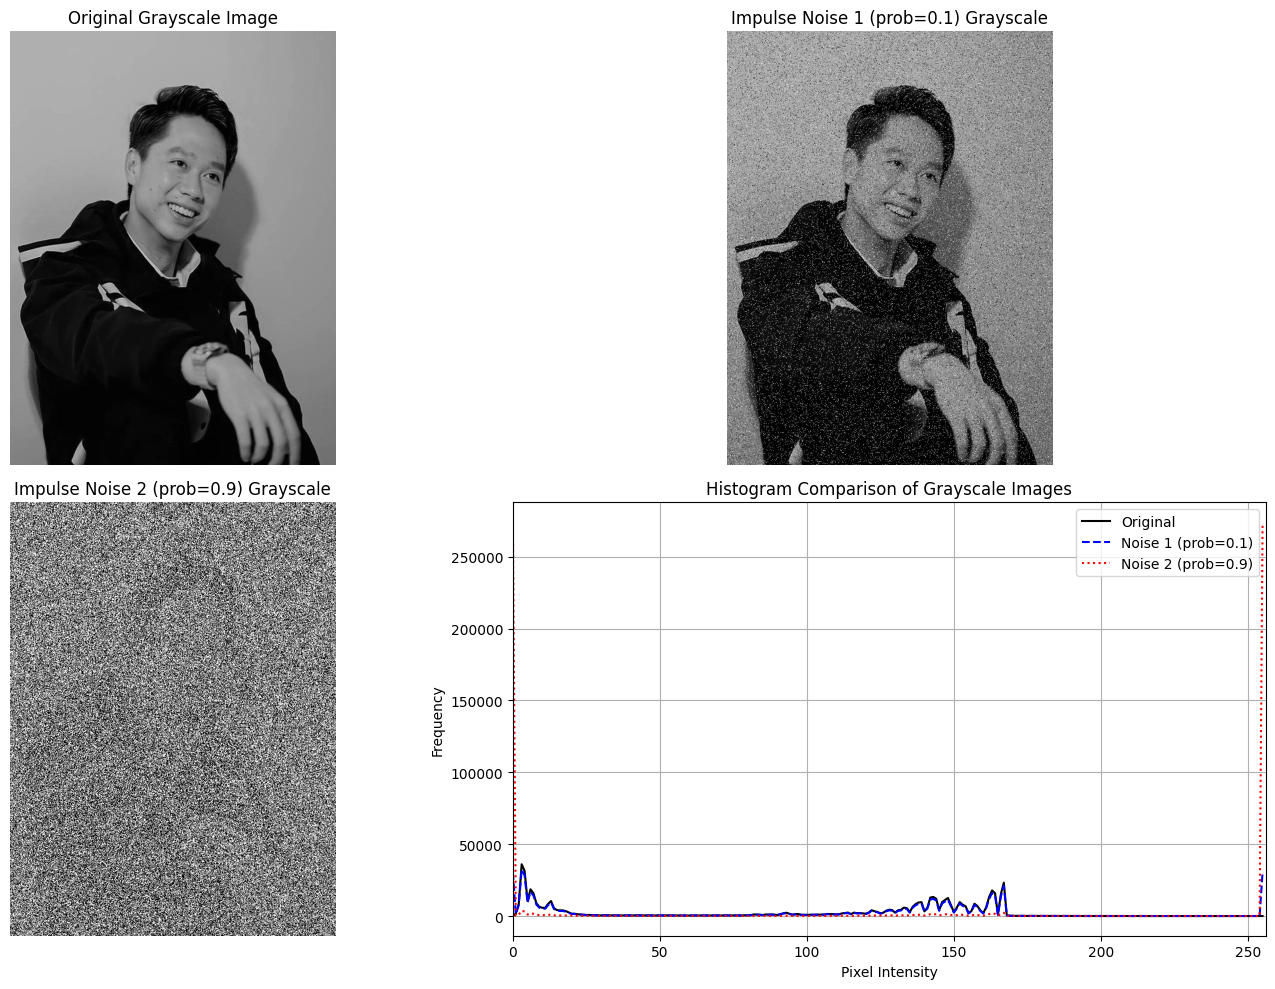

In [105]:
input_img = cv.imread(imgKevin_path)
if input_img is not None:
    # Add impulse noise to the image
    noisy_image1 = add_impulse_noise(input_img, prob=0.1)
    noisy_image2 = add_impulse_noise(input_img, prob=0.9)

    # Convert images to grayscale
    gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
    gray_noisy_image1 = cv.cvtColor(noisy_image1, cv.COLOR_BGR2GRAY)
    gray_noisy_image2 = cv.cvtColor(noisy_image2, cv.COLOR_BGR2GRAY)

    # Save the grayscale images
    cv.imwrite('output_gray_image.jpg', gray_img)
    cv.imwrite('output_gray_noise1.jpg', gray_noisy_image1)
    cv.imwrite('output_gray_noise2.jpg', gray_noisy_image2)

    # Display the original grayscale and noisy images using matplotlib
    plt.figure(figsize=(15, 10))

    # Plot original grayscale image (left)
    plt.subplot(2, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    # Plot noisy grayscale image with prob=0.1 (top right)
    plt.subplot(2, 2, 2)
    plt.imshow(gray_noisy_image1, cmap='gray')
    plt.title('Impulse Noise 1 (prob=0.1) Grayscale')
    plt.axis('off')

    # Plot noisy grayscale image with prob=0.9 (bottom left)
    plt.subplot(2, 2, 3)
    plt.imshow(gray_noisy_image2, cmap='gray')
    plt.title('Impulse Noise 2 (prob=0.9) Grayscale')
    plt.axis('off')

    # Calculate histograms for grayscale images
    plt.subplot(2, 2, 4)

    # Calculate histograms for grayscale images
    hist_original = cv.calcHist([gray_img], [0], None, [256], [0, 256])
    hist_noisy1 = cv.calcHist([gray_noisy_image1], [0], None, [256], [0, 256])
    hist_noisy2 = cv.calcHist([gray_noisy_image2], [0], None, [256], [0, 256])

    # Plot histograms for grayscale images
    plt.plot(hist_original, color='black', label='Original')
    plt.plot(hist_noisy1, color='blue', linestyle='dashed', label='Noise 1 (prob=0.1)')
    plt.plot(hist_noisy2, color='red', linestyle='dotted', label='Noise 2 (prob=0.9)')

    plt.title('Histogram Comparison of Grayscale Images')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True)

    # Save the figure with images and histograms
    plt.tight_layout()
    plt.savefig('grayscale_images_and_histograms_comparison.png')
    plt.show()

else:
    print("Unable to read the image from the provided path.")

Histogram gốc thể hiện phân bố cường độ pixel tự nhiên

Nhiễu 1 (xác suất=0.1) vẫn giữ được hình dạng tổng thể tương tự ảnh gốc nhưng các đỉnh hơi thấp hơn

Nhiễu 2 (xác suất=0.9) cho thấy sự suy giảm nghiêm trọng với histogram gần như phẳng và đồng đều

Điều này cho thấy impulse noise thay thế ngẫu nhiên các pixel bằng giá trị đen hoặc trắng, tạo hiệu ứng "salt and pepper"

Xác suất cao hơn (0.9) dẫn đến suy giảm hình ảnh nghiêm trọng, nội dung gốc hầu như không còn nhìn thấy

**Gaussian noise**

In [63]:
def add_gaussian_noise(image, mean, sigma):
    """
    Adds Gaussian noise to an image.

    Args:
    - image: Input image (numpy array).
    - mean: Mean of the Gaussian distribution (default is 0).
    - sigma: Standard deviation of the Gaussian distribution (controls noise intensity).

    Returns:
    - noisy_img: Image with added Gaussian noise.
    """
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)

    # Add the Gaussian noise to the image
    noisy_img = image.astype(np.float32) + gaussian_noise

    # Clip pixel values to be in the valid range [0, 255]
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return noisy_img


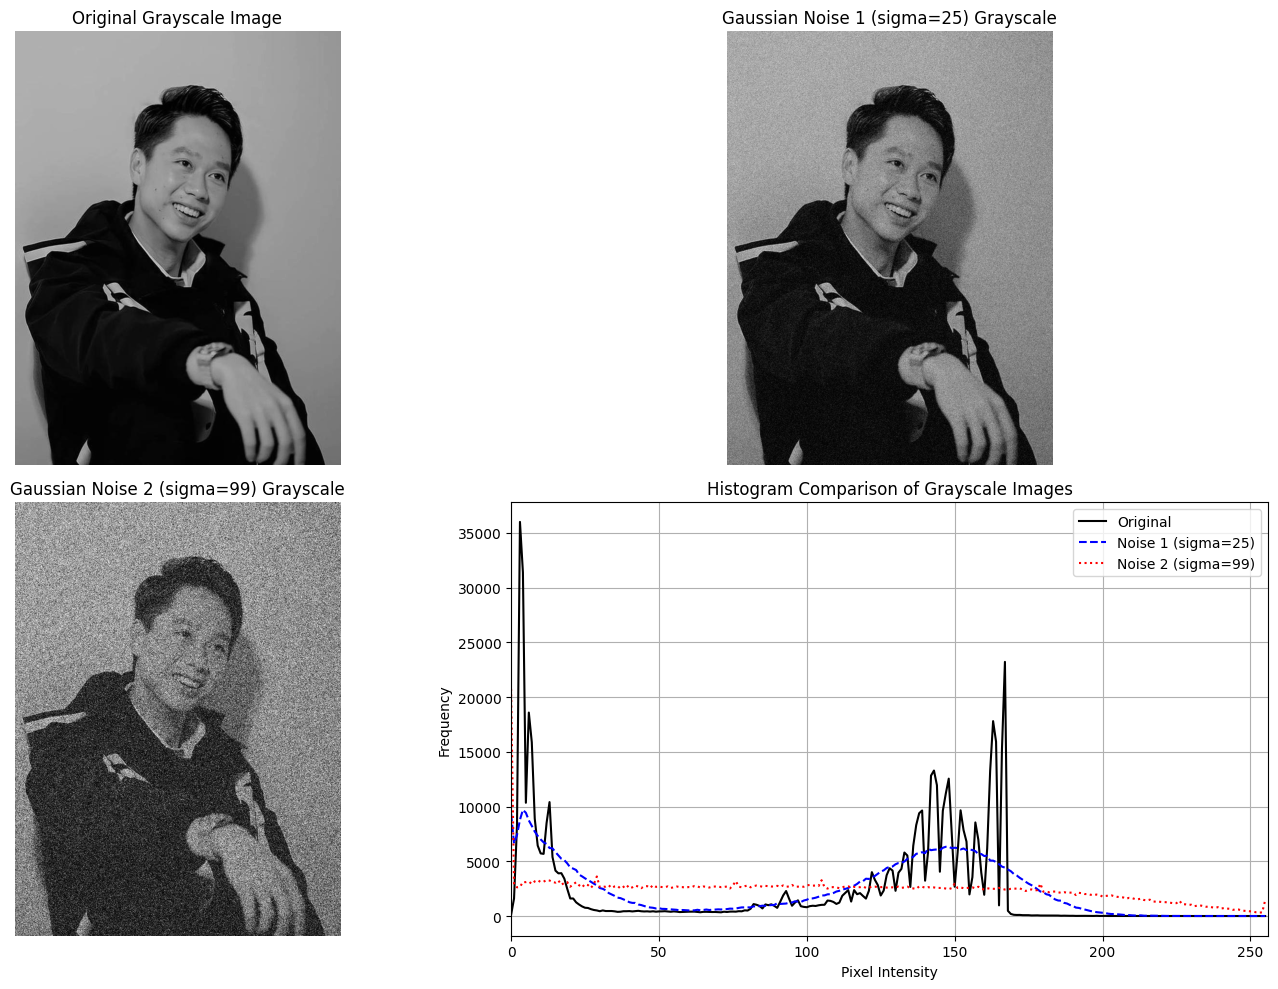

In [106]:
input_img = cv.imread(imgKevin_path)
if input_img is not None:
    # Add impulse noise to the image
    noisy_image1 = add_gaussian_noise(input_img,0,25)
    noisy_image2 = add_gaussian_noise(input_img,0,99)

    # Save the resulting noisy image
    cv.imwrite('output_gaussian_noise1.jpg', noisy_image1)
    cv.imwrite('output_gaussian_noise2.jpg', noisy_image2)

    # Convert images to grayscale
    gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
    gray_noisy_image1 = cv.cvtColor(noisy_image1, cv.COLOR_BGR2GRAY)
    gray_noisy_image2 = cv.cvtColor(noisy_image2, cv.COLOR_BGR2GRAY)

    # Save the grayscale images
    cv.imwrite('output_gray_image.jpg', gray_img)
    cv.imwrite('output_gray_noise1.jpg', gray_noisy_image1)
    cv.imwrite('output_gray_noise2.jpg', gray_noisy_image2)

    # Display the original grayscale and noisy images using matplotlib
    plt.figure(figsize=(15, 10))

    # Plot original grayscale image (left)
    plt.subplot(2, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    # Plot noisy grayscale image with sigma=25 (top right)
    plt.subplot(2, 2, 2)
    plt.imshow(gray_noisy_image1, cmap='gray')
    plt.title('Gaussian Noise 1 (sigma=25) Grayscale')
    plt.axis('off')

    # Plot noisy grayscale image with sigma=99 (bottom left)
    plt.subplot(2, 2, 3)
    plt.imshow(gray_noisy_image2, cmap='gray')
    plt.title('Gaussian Noise 2 (sigma=99) Grayscale')
    plt.axis('off')

    # Calculate histograms for grayscale images
    plt.subplot(2, 2, 4)

    # Calculate histograms for grayscale images
    hist_original = cv.calcHist([gray_img], [0], None, [256], [0, 256])
    hist_noisy1 = cv.calcHist([gray_noisy_image1], [0], None, [256], [0, 256])
    hist_noisy2 = cv.calcHist([gray_noisy_image2], [0], None, [256], [0, 256])

    # Plot histograms for grayscale images
    plt.plot(hist_original, color='black', label='Original')
    plt.plot(hist_noisy1, color='blue', linestyle='dashed', label='Noise 1 (sigma=25)')
    plt.plot(hist_noisy2, color='red', linestyle='dotted', label='Noise 2 (sigma=99)')

    plt.title('Histogram Comparison of Grayscale Images')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True)

    # Save the figure with images and histograms
    plt.tight_layout()
    plt.savefig('grayscale_images_and_histograms_comparison.png')
    plt.show()

else:
    print("Unable to read the image from the provided path.")



Histogram gốc có các đỉnh rõ ràng thể hiện các vùng cường độ khác nhau

Nhiễu 1 (sigma=25) gây ra hiệu ứng làm mịn histogram, làm các đỉnh thấp và rộng hơn

Nhiễu 2 (sigma=99) cho thấy sự phân tán đáng kể của phân bố cường độ

Gaussian noise thêm các biến đổi ngẫu nhiên theo phân phối chuẩn

Giá trị sigma cao hơn dẫn đến phân tán nhiều hơn trong histogram, thể hiện nhiễu mạnh hơn

In [73]:
def add_speckle_noise(image, sigma):
    """
    Adds speckle noise to an image.

    Args:
    - image: Input image (numpy array).
    - sigma: Standard deviation of the speckle noise (controls noise intensity).

    Returns:
    - noisy_img: Image with added speckle noise.
    """
    # Convert the image to float32 for accurate calculations
    image = image.astype(np.float32) / 255.0

    # Generate speckle noise (multiplicative noise)
    noise = np.random.randn(*image.shape) * sigma

    # Add the speckle noise to the image
    noisy_img = image + image * noise

    # Clip pixel values to the range [0, 1] and convert back to uint8
    noisy_img = np.clip(noisy_img, 0, 1)
    noisy_img = (noisy_img * 255).astype(np.uint8)

    return noisy_img

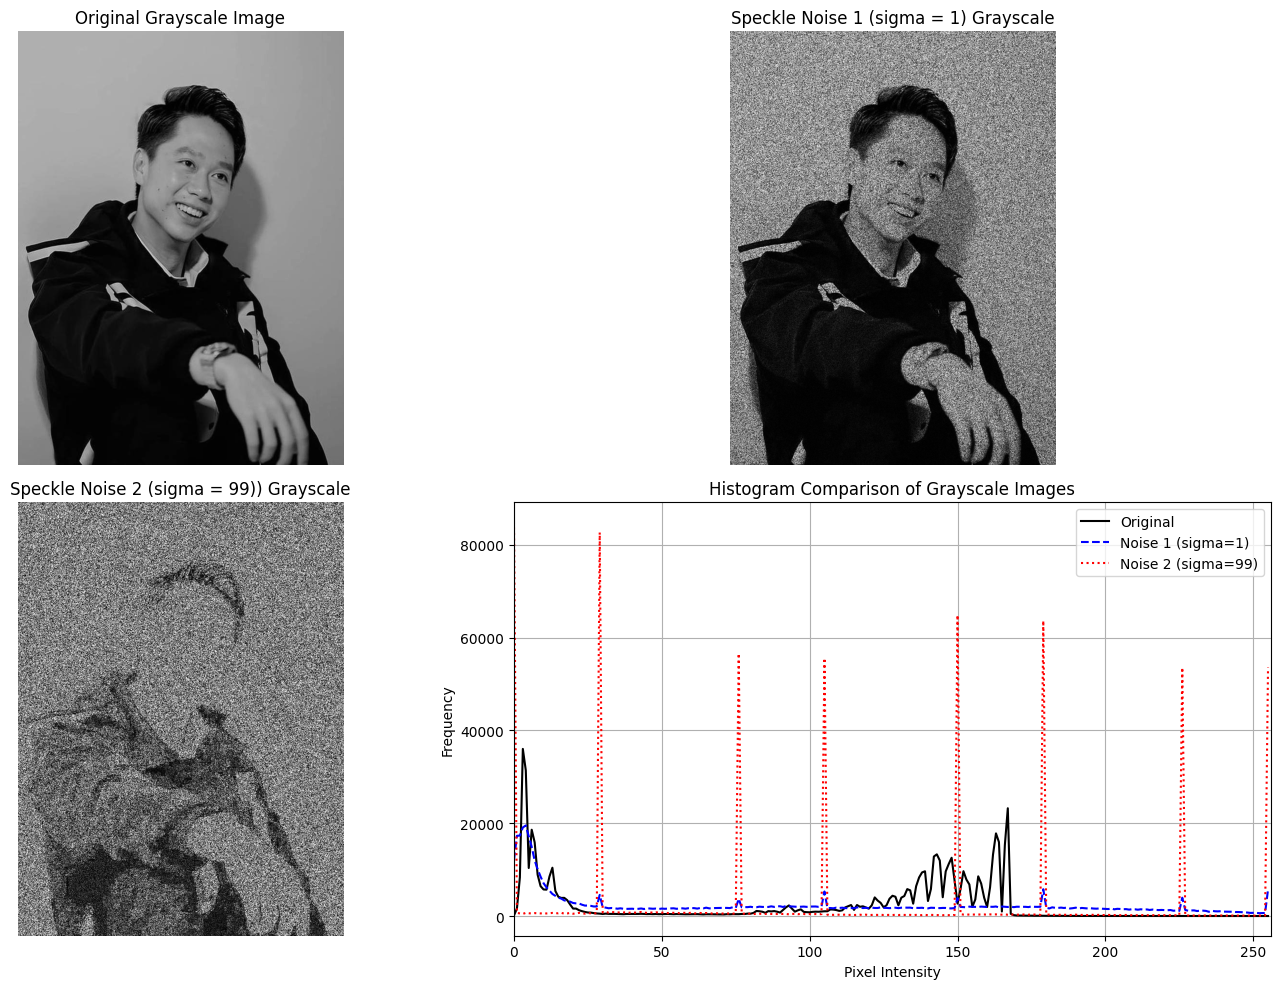

In [107]:
input_img = cv.imread(imgKevin_path)
if input_img is not None:
    # Add Speckle noise to the image
    noisy_image1 = add_speckle_noise(input_img,1)
    noisy_image2 = add_speckle_noise(input_img,99)

    # Save the resulting noisy image
    cv.imwrite('output_speckle_noise1.jpg', noisy_image1)
    cv.imwrite('output_speckle_noise2.jpg', noisy_image2)

    # Convert images to grayscale
    gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
    gray_noisy_image1 = cv.cvtColor(noisy_image1, cv.COLOR_BGR2GRAY)
    gray_noisy_image2 = cv.cvtColor(noisy_image2, cv.COLOR_BGR2GRAY)

    # Save the grayscale images
    cv.imwrite('output_gray_image.jpg', gray_img)
    cv.imwrite('output_gray_noise1.jpg', gray_noisy_image1)
    cv.imwrite('output_gray_noise2.jpg', gray_noisy_image2)

    # Display the original grayscale and noisy images using matplotlib
    plt.figure(figsize=(15, 10))

    # Plot original grayscale image (left)
    plt.subplot(2, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    # Plot noisy grayscale image with sigma=1 (top right)
    plt.subplot(2, 2, 2)
    plt.imshow(gray_noisy_image1, cmap='gray')
    plt.title('Speckle Noise 1 (sigma = 1) Grayscale')
    plt.axis('off')

    # Plot noisy grayscale image with sigma=99 (bottom left)
    plt.subplot(2, 2, 3)
    plt.imshow(gray_noisy_image2, cmap='gray')
    plt.title('Speckle Noise 2 (sigma = 99)) Grayscale')
    plt.axis('off')

    # Calculate histograms for grayscale images
    plt.subplot(2, 2, 4)

    # Calculate histograms for grayscale images
    hist_original = cv.calcHist([gray_img], [0], None, [256], [0, 256])
    hist_noisy1 = cv.calcHist([gray_noisy_image1], [0], None, [256], [0, 256])
    hist_noisy2 = cv.calcHist([gray_noisy_image2], [0], None, [256], [0, 256])

    # Plot histograms for grayscale images
    plt.plot(hist_original, color='black', label='Original')
    plt.plot(hist_noisy1, color='blue', linestyle='dashed', label='Noise 1 (sigma=1)')
    plt.plot(hist_noisy2, color='red', linestyle='dotted', label='Noise 2 (sigma=99)')

    plt.title('Histogram Comparison of Grayscale Images')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True)

    # Save the figure with images and histograms
    plt.tight_layout()
    plt.savefig('grayscale_images_and_histograms_comparison.png')
    plt.show()

else:
    print("Unable to read the image from the provided path.")




Histogram gốc thể hiện phân bố cường độ tự nhiên của ảnh

Nhiễu 1 (sigma = 1) vẫn giữ được một số điểm tương đồng với histogram gốc nhưng có thêm các đỉnh nhỏ

Nhiễu 2 (sigma = 99) cho thấy các đỉnh đột ngột trong histogram tại các khoảng đều đặn

Speckle Noise là nhiễu nhân, tạo ra kết cấu hạt

Xác suất cao hơn tạo ra các đỉnh rõ rệt hơn trong histogram, thể hiện hiệu ứng nhân mạnh hơn

In [79]:
def add_uniform_noise_img(img, noise_range):
    """
    Thêm nhiễu uniform vào ảnh đầu vào.

    Parameters:
        img (numpy.ndarray): Ảnh gốc (dạng mảng NumPy).
        noise_range (tuple): Khoảng giá trị nhiễu (min, max), thường nằm trong khoảng [-1, 1] nếu ảnh được chuẩn hóa.

    Returns:
        numpy.ndarray: Ảnh sau khi thêm nhiễu.
    """
    # Kiểm tra nếu ảnh có giá trị pixel từ 0 đến 255 thì chuẩn hóa về [0, 1]
    if img.dtype == np.uint8:
        img = img / 255.0

    # Tạo nhiễu uniform cùng kích thước với ảnh
    noise = np.random.uniform(low=noise_range[0], high=noise_range[1], size=img.shape)

    # Thêm nhiễu vào ảnh
    noisy_img = img + noise

    # Đảm bảo giá trị pixel nằm trong khoảng [0, 1]
    noisy_img = np.clip(noisy_img, 0, 1)

    # Chuyển ảnh về dạng uint8 nếu cần
    noisy_img = (noisy_img * 255).astype(np.uint8)

    return noisy_img



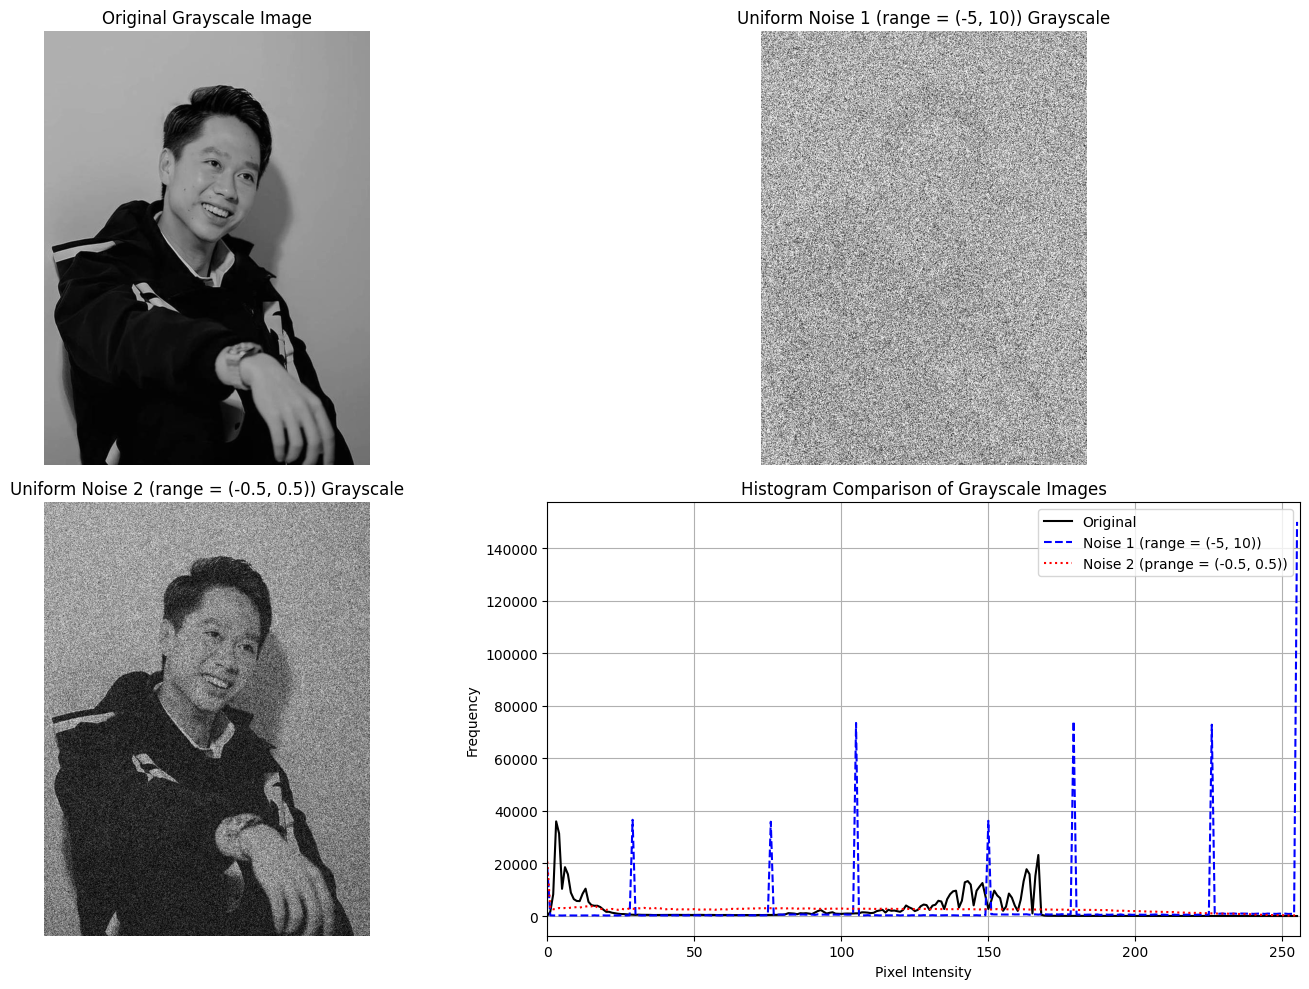

In [108]:
input_img = cv.imread(imgKevin_path)
if input_img is not None:
    # Add Uniform noise to the image
    noisy_image1 = add_uniform_noise_img(input_img,(-5, 10))
    noisy_image2 = add_uniform_noise_img(input_img,(-0.5, 0.5))

    # Save the resulting noisy image
    cv.imwrite('output_uniform_noise1.jpg', noisy_image1)
    cv.imwrite('output_uniform_noise2.jpg', noisy_image2)

     # Convert images to grayscale
    gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
    gray_noisy_image1 = cv.cvtColor(noisy_image1, cv.COLOR_BGR2GRAY)
    gray_noisy_image2 = cv.cvtColor(noisy_image2, cv.COLOR_BGR2GRAY)

    # Save the grayscale images
    cv.imwrite('output_gray_image.jpg', gray_img)
    cv.imwrite('output_gray_noise1.jpg', gray_noisy_image1)
    cv.imwrite('output_gray_noise2.jpg', gray_noisy_image2)

    # Display the original grayscale and noisy images using matplotlib
    plt.figure(figsize=(15, 10))

    # Plot original grayscale image (left)
    plt.subplot(2, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    # Plot noisy grayscale image with range = (-5, 10) (top right)
    plt.subplot(2, 2, 2)
    plt.imshow(gray_noisy_image1, cmap='gray')
    plt.title('Uniform Noise 1 (range = (-5, 10)) Grayscale')
    plt.axis('off')

    # Plot noisy grayscale image with range = (-0.5, 0.5) (bottom left)
    plt.subplot(2, 2, 3)
    plt.imshow(gray_noisy_image2, cmap='gray')
    plt.title('Uniform Noise 2 (range = (-0.5, 0.5)) Grayscale')
    plt.axis('off')

    # Calculate histograms for grayscale images
    plt.subplot(2, 2, 4)

    # Calculate histograms for grayscale images
    hist_original = cv.calcHist([gray_img], [0], None, [256], [0, 256])
    hist_noisy1 = cv.calcHist([gray_noisy_image1], [0], None, [256], [0, 256])
    hist_noisy2 = cv.calcHist([gray_noisy_image2], [0], None, [256], [0, 256])

    # Plot histograms for grayscale images
    plt.plot(hist_original, color='black', label='Original')
    plt.plot(hist_noisy1, color='blue', linestyle='dashed', label='Noise 1 (range = (-5, 10))')
    plt.plot(hist_noisy2, color='red', linestyle='dotted', label='Noise 2 (prange = (-0.5, 0.5))')

    plt.title('Histogram Comparison of Grayscale Images')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True)

    # Save the figure with images and histograms
    plt.tight_layout()
    plt.savefig('grayscale_images_and_histograms_comparison.png')
    plt.show()

else:
    print("Unable to read the image from the provided path.")

Histogram gốc có các đỉnh và valley tự nhiên

Nhiễu 1 (khoảng = (-5,10)) cho thấy các đỉnh thẳng đứng rõ rệt trong histogram tại các khoảng đều đặn

Uniform noise thêm các giá trị ngẫu nhiên trong một khoảng xác định vào tất cả các pixel

Các đỉnh trong histogram chỉ ra các mức nhiễu rời rạc được thêm vào

Mẫu cho thấy phân bố đều của các giá trị nhiễu trong khoảng xác định

**Impulse noise**:  khi xác suất prob > 0.5, ảnh sẽ bắt đầu bị nhiễu nghiêm trọng vì hơn 50% pixel bị thay thế bởi giá trị ngẫu nhiên đen/trắng

**Gaussian noise**: Khi sigma > 100, ảnh sẽ bị nhiễu quá mức đến mức khó nhận dạng do độ lệch chuẩn của nhiễu quá lớn

**Speckle noise**: Khi prob > 0.7, ảnh sẽ bị nhiễu quá mức do hiệu ứng nhân của Speckle noise trở nên quá mạnh

**Uniform noise**:  Khi range quá lớn, khoảng cách giữa đầu và cuối quá cao (>5), ảnh sẽ bị nhiễu quá mức do biên độ nhiễu quá lớn so với dải giá trị pixel gốc


# Áp dụng bộ lọc tích chập và lọc ảnh

## 2.1 Áp dụng các bộ lọc tích chập cơ bản

**Làm mờ + Phát hiện cạnh + làm sắc nét**

In [93]:
def apply_convolution_filter(image, kernel):
    """
    Apply a convolution filter to an image.

    Parameters:
    image (numpy array): Input color image.
    kernel (numpy array): Convolution kernel (filter) to apply.

    Returns:
    numpy array: Filtered color image.
    """
    # Apply the convolution filter to each color channel
    filtered_image = np.zeros_like(image)
    for c in range(3):  # Loop over B, G, R channels
        filtered_image[:, :, c] = cv.filter2D(image[:, :, c], -1, kernel)
    return filtered_image

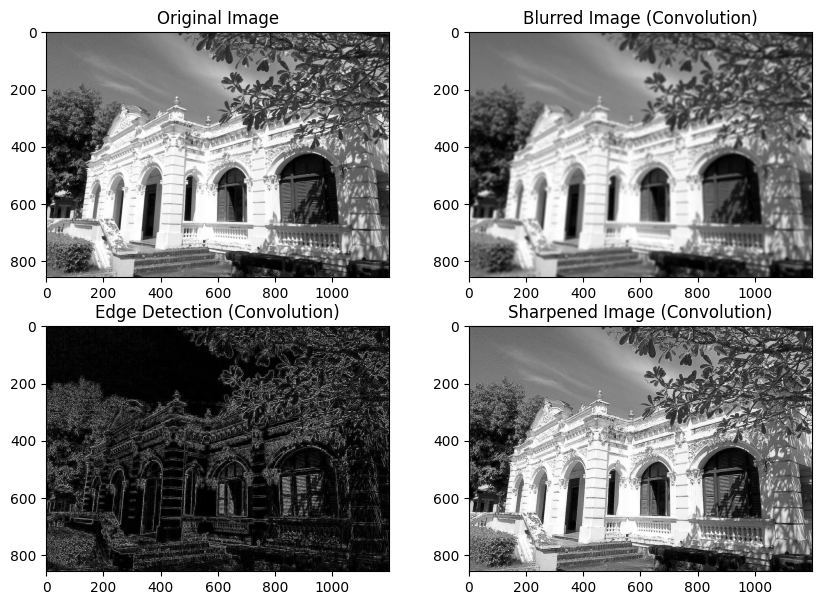

In [109]:
# Load the input noise image
image = cv.imread(imgRachGia_path)

# Define different kernels for various effects
# Blur kernel (averaging filter)
blur_kernel = np.ones((9, 9), np.float32) / 81

# Edge detection kernel (Sobel)
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]], np.float32)

# Sharpen kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], np.float32)

# Apply each filter

blurred_image = apply_convolution_filter(image, blur_kernel)
edge_image = apply_convolution_filter(image, edge_kernel)
sharpened_image = apply_convolution_filter(image, sharpen_kernel)

# Convert images to grayscale
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_blur_img = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)
gray_edge_image = cv.cvtColor(edge_image, cv.COLOR_BGR2GRAY)
gray_sharpened_image = cv.cvtColor(sharpened_image, cv.COLOR_BGR2GRAY)

# Display the original and filtered images
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(gray_blur_img, cmap='gray')
plt.title('Blurred Image (Convolution)')
plt.subplot(2, 2, 3)
plt.imshow(gray_edge_image, cmap='gray')
plt.title('Edge Detection (Convolution)')
plt.subplot(2, 2, 4)
plt.imshow(gray_sharpened_image, cmap='gray')
plt.title('Sharpened Image (Convolution)')
plt.show()



1. Ảnh Blur (Blurred Image):


Sử dụng kernel 9x9 làm mờ đều, các chi tiết nhỏ và sắc nét bị mất đi, các cạnh của tòa nhà trở nên mờ hơn, các chi tiết kiến trúc phức tạp trên mặt tiền tòa nhà bị mờ đi đáng kể, các chi tiết của lá cây phía trên cũng bị mờ và hòa lẫn vào nhau góp phần tạo hiệu ứng mờ tổng thể cho bức ảnh


2. Ảnh phát hiện cạnh (Edge Detection):


Sử dụng kernel Sobel để phát hiện cạnh, làm nổi bật tất cả các đường viền và chuyển tiếp trong ảnh, rõ nét các đường viền kiến trúc: cột, cửa vòm, chi tiết trang trí, cấu trúc của các cành cây và lá được hiển thị rõ, các vùng đồng nhất như bầu trời trở nên tối đen, tạo ra ảnh đen trắng với các cạnh được làm nổi bật


3. Ảnh làm sắc nét (Sharpened Image):


Sử dụng kernel làm sắc nét, tăng cường độ tương phản tại các cạnh, chi tiết kiến trúc trở nên sắc nét và rõ ràng hơn ảnh gốc, các đường nét của cửa sổ, cột và các họa tiết trang trí được làm rõ, kết cấu của lá cây và bóng đổ cũng được tăng cường độ tương phản, giữ được thông tin tổng thể của ảnh nhưng tăng độ chi tiết

## 2.2 Áp dụng các bộ lọc tích chập cơ bản

**Harmonic mean filter**

In [116]:
def harmonic_mean_filter(noisy_image, kernel_size):
    """
    Apply Harmonic Mean Filter to denoise an image channel-wise.

    Parameters:
    noisy_image (numpy array): Input noisy image (color).
    kernel_size (int): Size of the filter kernel. Default is 3.

    Returns:
    numpy array: Denoised color image.
    """
    # Initialize the output image with the same shape as the input
    denoised_image = np.zeros_like(noisy_image, dtype=np.float32)

    # Process each color channel separately
    for c in range(3):  # Loop over B, G, R channels
        # Padding to handle borders for each channel
        pad_size = kernel_size // 2
        padded_channel = cv.copyMakeBorder(noisy_image[:, :, c], pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

        # Traverse each pixel in the channel
        for i in range(pad_size, padded_channel.shape[0] - pad_size):
            for j in range(pad_size, padded_channel.shape[1] - pad_size):
                # Extract the local neighborhood (kernel window) for the current channel
                local_region = padded_channel[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

                # Calculate harmonic mean in the kernel region, avoiding zero values to prevent division errors
                local_region = local_region.astype(np.float32)
                harmonic_mean = kernel_size * kernel_size / np.sum(1.0 / (local_region + 1e-10))

                # Assign the harmonic mean to the output image's channel
                denoised_image[i - pad_size, j - pad_size, c] = harmonic_mean

    # Convert the image back to 8-bit format
    denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

    return denoised_image




**Geometric mean filter**

In [113]:
def geometric_mean_filter(noisy_image, kernel_size):
    """
    Apply Geometric Mean Filter to denoise an image channel-wise.

    Parameters:
    noisy_image (numpy array): Input noisy image (color).
    kernel_size (int): Size of the filter kernel. Default is 3.

    Returns:
    numpy array: Denoised color image.
    """
    # Initialize the output image with the same shape as the input
    denoised_image = np.zeros_like(noisy_image, dtype=np.float32)

    # Process each color channel separately
    for c in range(3):  # Loop over B, G, R channels
        # Padding to handle borders for each channel
        pad_size = kernel_size // 2
        padded_channel = cv.copyMakeBorder(noisy_image[:, :, c], pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

        # Traverse each pixel in the channel
        for i in range(pad_size, padded_channel.shape[0] - pad_size):
            for j in range(pad_size, padded_channel.shape[1] - pad_size):
                # Extract the local neighborhood (kernel window) for the current channel
                local_region = padded_channel[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

                # Calculate geometric mean, avoiding zero values with a small epsilon
                local_region = local_region.astype(np.float32) + 1e-10
                geometric_mean = np.exp(np.sum(np.log(local_region)) / (kernel_size * kernel_size))

                # Assign the geometric mean to the output image's channel
                denoised_image[i - pad_size, j - pad_size, c] = geometric_mean

    # Convert the image back to 8-bit format
    denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

    return denoised_image




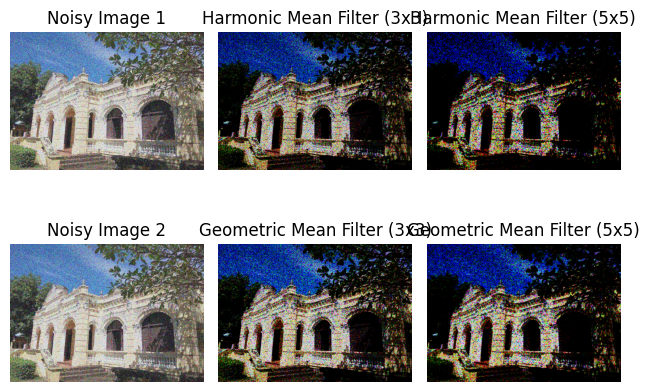

In [121]:
# Tạo ảnh Gaussian Noise

input_img = cv.imread(imgRachGia_path)
if input_img is not None:
    # Add impulse noise to the image
    noisy_image = add_gaussian_noise(input_img,0,100)

    # Save the resulting noisy image
    cv.imwrite('output_gaussian_noise.jpg', noisy_image)


# Apply Harmonic Mean Filter on the color image
denoised_image1 = harmonic_mean_filter(noisy_image, kernel_size=3)
denoised_image2 = harmonic_mean_filter(noisy_image, kernel_size=5)


# Apply Geometric Mean Filter on the color image
denoised_image3 = geometric_mean_filter(noisy_image, kernel_size=3)
denoised_image4 = geometric_mean_filter(noisy_image, kernel_size=5)

# Original noisy image
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title('Noisy Image 1')
plt.axis('off')

# Denoised image 1 (Harmonic Mean Filter, kernel_size=3)
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(denoised_image1, cv.COLOR_BGR2RGB))
plt.title('Harmonic Mean Filter (3x3)')
plt.axis('off')

# Denoised image 2 (Harmonic Mean Filter, kernel_size=5)
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(denoised_image2, cv.COLOR_BGR2RGB))
plt.title('Harmonic Mean Filter (5x5)')
plt.axis('off')

# Original noisy image 2
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title('Noisy Image 2')
plt.axis('off')

# Denoised image 3 (Geometric Mean Filter, kernel_size=3)
plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(denoised_image3, cv.COLOR_BGR2RGB))
plt.title('Geometric Mean Filter (3x3)')
plt.axis('off')

# Denoised image 4 (Geometric Mean Filter, kernel_size=5)
plt.subplot(2, 3, 6)
plt.imshow(cv.cvtColor(denoised_image4, cv.COLOR_BGR2RGB))
plt.title('Geometric Mean Filter (5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

Trước khi đi vào so sánh, chúng ta cần hiểu rõ về hai loại bộ lọc này:

Bộ lọc trung bình hài hòa: Bộ lọc này đặc biệt hiệu quả trong việc giảm nhiễu xung (salt-and-pepper noise) và bảo tồn các chi tiết cạnh. Nó tính trung bình hài hòa của các pixel trong một vùng lân cận, giảm ảnh hưởng của các pixel có giá trị cực đại hoặc cực tiểu.

Bộ lọc trung bình hình học: Bộ lọc này cũng có tác dụng làm giảm nhiễu, nhưng hiệu quả không mạnh bằng bộ lọc trung bình hài hòa. Nó tính trung bình nhân của các pixel trong một vùng lân cận.



Ảnh gốc: Cả hai ảnh gốc đều bị nhiễu Gaussian.

Ảnh sau khi áp dụng bộ lọc 3x3 và 5x5:

**Bộ lọc trung bình hài hòa**:

Kích thước 3x3:

Ưu điểm: Giảm đáng kể nhiễu Gaussian, làm cho hình ảnh trông mịn màng hơn. Bảo tồn tương đối tốt các chi tiết lớn như đường nét của kiến trúc.

Nhược điểm: Một số chi tiết nhỏ như các chi tiết trên mái nhà, các ô cửa sổ có thể bị mờ nhạt hoặc mất đi. Xuất hiện hiệu ứng halo nhẹ xung quanh các cạnh vật thể.

Kích thước 5x5:

Ưu điểm: Giảm nhiễu hiệu quả hơn so với kích thước 3x3.

Nhược điểm: Mất nhiều chi tiết hơn, đặc biệt là các chi tiết nhỏ và các cạnh sắc nét. Hình ảnh bị mờ nhạt và thiếu tự nhiên.

**Bộ lọc trung bình hình học:**

Kích thước 3x3:

Ưu điểm: Bảo toàn chi tiết tốt hơn so với bộ lọc trung bình hài hòa. Giảm một phần nhiễu Gaussian.

Nhược điểm: Hiệu quả giảm nhiễu không cao bằng bộ lọc trung bình hài hòa.Vẫn còn một số điểm nhiễu còn sót lại.

Kích thước 5x5:

Ưu điểm: Giảm nhiễu tốt hơn so với kích thước 3x3.

Nhược điểm: Mất nhiều chi tiết, đặc biệt là các chi tiết nhỏ và các cạnh sắc nét. Hình ảnh bị mờ nhạt và thiếu tự nhiên.



# Bài tập mở rộng


## 3.
Hàm fastNlMeansDenoisingColored() trong OpenCV là một phương pháp lọc ảnh nhằm giảm nhiễu cho các ảnh màu bằng cách sử dụng phương pháp Non-Local Means (NLM). Đây là một phương pháp hiệu quả để giảm nhiễu trong ảnh, đặc biệt là ảnh màu, mà không làm mất đi quá nhiều chi tiết của ảnh gốc.



**Cú pháp hàm:**
cv.fastNlMeansDenoisingColored(src, dst=None, h=10, templateWindowSize=7, searchWindowSize=21)

Các tham số:
1. src (Input image):

Loại: numpy.ndarray
Ý nghĩa: Ảnh đầu vào cần giảm nhiễu. Ảnh này phải là ảnh màu với ba kênh màu (BGR), có định dạng np.ndarray.

2. dst (Output image):

Loại: numpy.ndarray (Có thể là None nếu bạn muốn hàm tự tạo một ảnh đầu ra).
Ý nghĩa: Ảnh đầu ra sau khi đã áp dụng thuật toán lọc. Nếu không truyền vào giá trị này, hàm sẽ tự tạo ảnh đầu ra với cùng kích thước và kiểu dữ liệu như ảnh đầu vào.

3. h (filter strength):

Loại: float
Ý nghĩa: Tham số này điều chỉnh độ mạnh của bộ lọc. Nó xác định mức độ ảnh hưởng của các điểm lân cận trong quá trình lọc. Giá trị nhỏ làm giảm nhiễu nhưng cũng có thể làm mất chi tiết của ảnh, trong khi giá trị lớn hơn có thể giữ chi tiết nhưng làm giảm hiệu quả lọc nhiễu.
Giá trị khuyến nghị: 10 là một giá trị khá tốt, nhưng bạn có thể điều chỉnh để tìm ra giá trị phù hợp với ảnh của mình.


4. templateWindowSize (Size of the local window used for calculating the similarity):

Loại: int
Ý nghĩa: Kích thước của cửa sổ dùng để tính độ tương tự giữa các điểm ảnh trong quá trình lọc. Kích thước này xác định số lượng điểm ảnh lân cận sẽ được so sánh với điểm ảnh hiện tại để quyết định xem chúng có giống nhau hay không.
Giá trị khuyến nghị: Giá trị này thường được chọn là 7 (ví dụ: cửa sổ 7x7).

5. searchWindowSize (Size of the search window):

Loại: int
Ý nghĩa: Kích thước của cửa sổ tìm kiếm, xác định phạm vi tìm kiếm các điểm ảnh tương tự với điểm ảnh hiện tại. Tham số này quyết định số lượng điểm ảnh có thể được so sánh với điểm ảnh trong cửa sổ tìm kiếm.
Giá trị khuyến nghị: Giá trị này thường là 21 (cửa sổ tìm kiếm 21x21).


Mô tả hoạt động:
Phương pháp Non-Local Means dựa trên ý tưởng rằng các điểm ảnh tương tự trong ảnh (dù có thể ở các khu vực khác nhau của ảnh) có thể dùng để thay thế các điểm ảnh bị nhiễu. Để làm điều này, hàm fastNlMeansDenoisingColored() sẽ tính toán độ tương tự giữa điểm ảnh hiện tại và các điểm ảnh trong cửa sổ tìm kiếm và thay thế điểm ảnh bị nhiễu bằng trung bình có trọng số của các điểm ảnh tương tự từ một cửa sổ xung quanh.




## 4. Nêu ý kiến về sự khác biệt và giống nhau giữa 2 kỹ thuật denoise và filtering

Kỹ thuật denoise và filtering thực chất có điểm chung và khác biệt rất rõ rệt trong việc xử lý ảnh, và sự khác nhau giữa chúng thực sự rất thú vị khi nhìn từ góc độ ứng dụng thực tế.



1. Giống nhau:

Cả hai kỹ thuật đều cố gắng "cải thiện" chất lượng của ảnh. Mục tiêu chung của chúng là loại bỏ một cái gì đó không mong muốn (nhiễu hoặc sự sai lệch), hoặc làm cho ảnh dễ nhìn hơn, rõ ràng hơn và dễ phân tích hơn.

Denoising là một kỹ thuật lọc nhiễu, nhưng mục đích chính là giảm thiểu sự nhiễu trong ảnh, để làm cho ảnh "sạch" và dễ nhìn hơn.
Filtering có thể là một thuật ngữ rộng hơn, bao gồm nhiều loại bộ lọc khác nhau (không chỉ lọc nhiễu), như làm mượt, làm sắc nét, làm mờ (blur), hay thậm chí chỉ làm thay đổi độ sáng tối của ảnh.

2. Khác nhau:

Denoising tập trung vào việc giảm nhiễu mà không làm mất đi các chi tiết quan trọng của ảnh. Nói đơn giản là nó chỉ muốn "làm dịu" những thứ gây rối trong ảnh (ví dụ như nhiễu do cảm biến, nhiễu do ánh sáng yếu, hoặc thậm chí nhiễu từ các phương pháp chụp ảnh cũ). Một số kỹ thuật denoise sử dụng thông tin từ các vùng tương tự trong ảnh để thay thế điểm ảnh bị nhiễu, như trong Non-Local Means.

Ví dụ, nếu ta chụp ảnh trong điều kiện ánh sáng yếu và máy ảnh của ta tự động tăng ISO, ta có thể nhận được một bức ảnh có rất nhiều hạt nhiễu. Kỹ thuật denoise như fastNlMeansDenoisingColored sẽ giúp giảm bớt nhiễu mà không làm ảnh trông quá mờ hoặc mất chi tiết.

Filtering, ngược lại, không chỉ là giảm nhiễu, mà có thể thay đổi cấu trúc tổng thể của ảnh. Một bộ lọc có thể làm mờ ảnh (Blur), làm sắc nét (Sharpen), hoặc thậm chí thay đổi các đặc tính khác của ảnh mà không nhất thiết liên quan đến nhiễu. Filtering có thể được sử dụng trong các kỹ thuật như Edge Detection, làm nổi bật các cạnh trong ảnh, hoặc thậm chí tạo ra các hiệu ứng nghệ thuật.

Ví dụ, ta có thể dùng một bộ lọc Gaussian Blur để làm mờ nền của một bức ảnh chân dung, giúp chủ thể nổi bật hơn. Hoặc, ta có thể dùng bộ lọc Sobel để tìm các cạnh trong ảnh để nhận diện đối tượng.

Sự khác biệt lớn nhất:
Denoising tập trung vào việc loại bỏ cái gì đó (nhiễu) mà ảnh không nên có.
Filtering có thể là một quá trình thay đổi ảnh để phục vụ cho mục đích khác ngoài việc loại bỏ nhiễu (như làm sắc nét, làm mờ, làm nổi bật, hoặc thậm chí tạo hiệu ứng).

Ví dụ:
Giả sử ta chụp ảnh một chiếc xe cũ trên đường phố vào một buổi tối, với ánh sáng yếu và trời mưa. Bức ảnh sẽ chứa rất nhiều nhiễu (hạt nhỏ, không rõ hình dạng), đó chính là lúc denoise sẽ phát huy tác dụng. Sau khi sử dụng kỹ thuật denoise, ta sẽ có một bức ảnh sạch sẽ, không còn nhiễu, nhưng chi tiết của chiếc xe và các yếu tố khác vẫn giữ nguyên.

Giờ ta muốn tạo hiệu ứng nghệ thuật để chiếc xe nổi bật hơn trong bối cảnh thành phố nhộn nhịp phía sau, ta sẽ dùng filtering. Ta có thể áp dụng bộ lọc sắc nét cho chiếc xe để làm nổi bật các chi tiết, hoặc làm mờ nền để chiếc xe trở thành trung tâm của bức ảnh